# 데이터 시각화

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r"https://drive.google.com/u/3/uc?id=1wNWaq71HBSoGWqt-e-4mJKMLGSg_fV5n&export=download", encoding='cp949')
df = df.iloc[:100]
df.head()

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20200611,중앙선,지평,71,49,20200614
1,20200611,중앙선,용문,1796,1841,20200614
2,20200611,중앙선,원덕,307,298,20200614
3,20200611,중앙선,양평,2475,2462,20200614
4,20200611,중앙선,오빈,293,281,20200614


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

기본 Font가 한글을 지원하지 않아 Font를 변경해야 합니다. 

1) 폰트 설치

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

2) 런타임 재시작

3) 폰트 로딩

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 라인차트

`승차총승객수`를 라인 차트로 표현해 봅시다. 

`승차총승객수`와 `하차총승객수`를 시각화해 봅시다. 

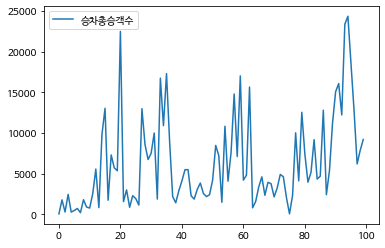

In [21]:
# df['승차총승객수'].plot()
# df['승차총승객수'].plot.line()
df.plot.line(y='승차총승객수')

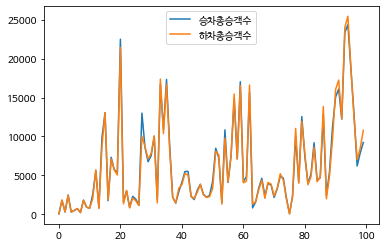

In [30]:
df[['승차총승객수', '하차총승객수']].plot.line()

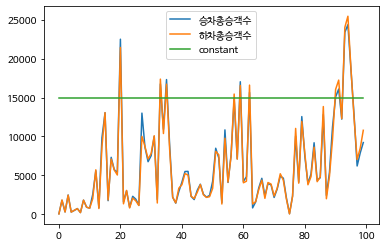

In [31]:
df['constant'] = 15000
df[  ['승차총승객수', '하차총승객수', 'constant']  ].plot.line()

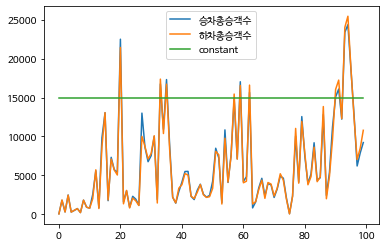

In [32]:
df.plot.line(y=['승차총승객수', '하차총승객수', 'constant'])

`figsize` 파라미터는 차트의 크기를 지정합니다.

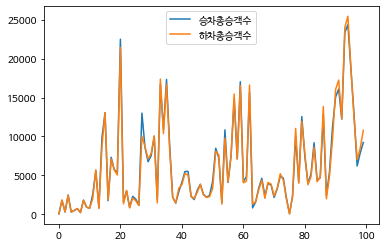

In [33]:
df[['승차총승객수', '하차총승객수']].plot(     )

plot은 기본적으로 라인차트를 출력하지만, 명시적으로 라인 차트를 호출할 수 있습니다. 

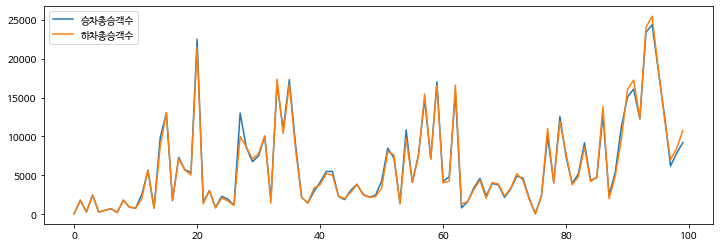

In [34]:
df[['승차총승객수', '하차총승객수']].plot.line( figsize=(12, 4))

## 막대 차트

`승차총승객수`와 `하차총승객수`를 라인차트로 그려봅시다. 

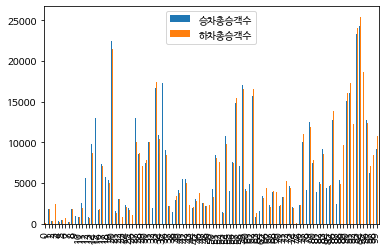

In [35]:
df[['승차총승객수', '하차총승객수']].plot.bar( )

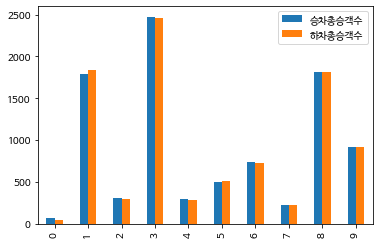

In [36]:
df.iloc[:10][['승차총승객수', '하차총승객수']].plot.bar( )

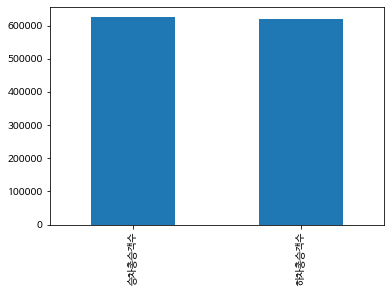

In [37]:
df[['승차총승객수', '하차총승객수']].sum() # Series
df[['승차총승객수', '하차총승객수']].sum().plot.bar()

호선별 승차총 `승차총승객수`를 시각화하라

In [43]:
df.head()

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자,constant
0,20200611,중앙선,지평,71,49,20200614,15000
1,20200611,중앙선,용문,1796,1841,20200614,15000
2,20200611,중앙선,원덕,307,298,20200614,15000
3,20200611,중앙선,양평,2475,2462,20200614,15000
4,20200611,중앙선,오빈,293,281,20200614,15000


In [45]:
df = df.drop(['등록일자','constant'], axis=1)
df.head()

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20200611,중앙선,지평,71,49
1,20200611,중앙선,용문,1796,1841
2,20200611,중앙선,원덕,307,298
3,20200611,중앙선,양평,2475,2462
4,20200611,중앙선,오빈,293,281


In [46]:
df.columns = ['일자','호선','역','승차','하차']
df.head(2)

,일자,호선,역,승차,하차
0,20200611,중앙선,지평,71,49
1,20200611,중앙선,용문,1796,1841


In [57]:
how = {
    '승차': sum
}
df.groupby('호선').agg(   how  )
# df.groupby('호선').agg(승차합=('승차','sum'))

,승차
호선,
분당선,241616
수인선,37704
안산선,107722
우이신설선,40047
일산선,101815
장항선,10910
중앙선,84484


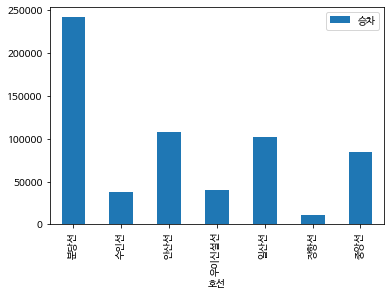

In [58]:
df.groupby('호선').agg(   how  ).plot.bar()

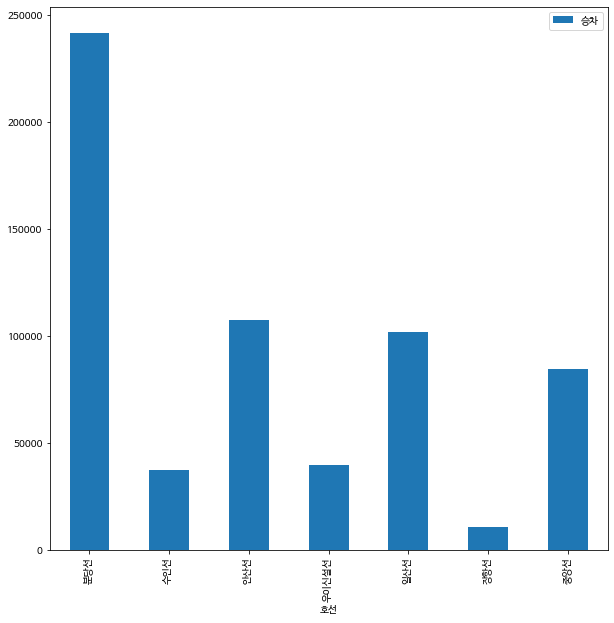

In [61]:
t = df.groupby('호선').agg(   how  ).sort_values('호선')
t.plot.bar(figsize=(10,10))

## 산포도

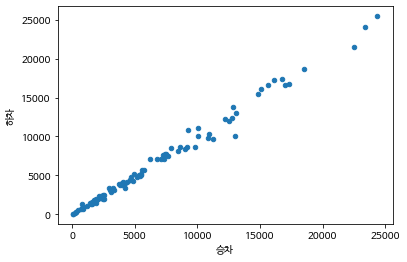

In [52]:
df.plot.scatter(x='승차', y='하차')

상관 계수 구하기

In [53]:
df[['승차', '하차']].corr()

,승차,하차
승차,1.000000,0.994832
하차,0.994832,1.000000


참고자료
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html